=== Decision Tree Classifier ===
Train Accuracy: 0.7943706020328382
Test Accuracy: 0.73125

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72       149
           1       0.75      0.74      0.75       171

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320



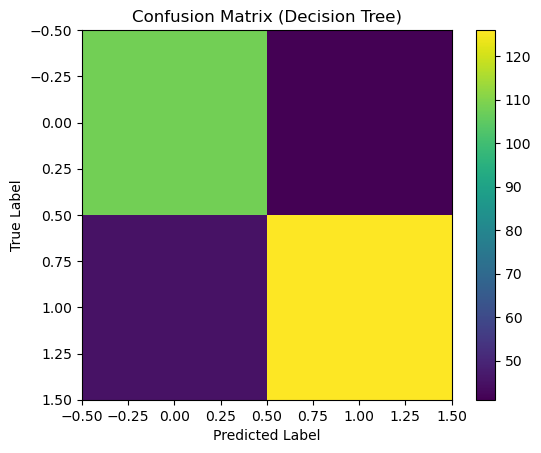

In [1]:
# Decision Tree Classification on Wine Quality Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# Load Dataset
# -----------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Convert quality to binary classification
# 1 = high quality (>= 6), 0 = low quality (< 6)
X = data.drop('quality', axis=1).values
y = (data['quality'] >= 6).astype(int)

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Decision Tree Model
# -----------------------------
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

# Train model
tree.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# -----------------------------
# Evaluation
# -----------------------------
print("=== Decision Tree Classifier ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix Visualization
# -----------------------------
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm)
plt.title("Confusion Matrix (Decision Tree)")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Summary & Discussion

#We applied a **Decision Tree classifier** to classify wines as low or high quality based on physicochemical features. Decision Trees recursively split the feature space to maximize class purity at each node.

#**Key Points:**
#- Decision Trees handle non-linear relationships without feature scaling.
#- The tree structure provides interpretable decision rules.
#- Limiting the tree depth helped reduce overfitting.

#**Limitations:**
#- Deep trees are prone to overfitting.
#- Small changes in data can lead to very different trees.
#- Single trees often underperform ensemble methods.

#**Potential Improvements:**
#- Tune hyperparameters such as `max_depth` and `min_samples_leaf`.
#- Use ensemble methods like Random Forests or Gradient Boosting.
#- Perform feature importance analysis.

#**Conclusion:**
#Decision Trees offer an intuitive and interpretable approach to classification and serve as a strong foundation for more advanced tree-based models.
